In [1]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists

# save API call data in the data folder you created for project part 1

In [2]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [3]:
import json
with open('/Users/Alexander/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [4]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(700)

In [6]:
## movie objects have a .info dictionary 
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/xTS1qCmhzH3vq7cuextO5vQA6eW.jpg',
 'belongs_to_collection': {'id': 645,
  'name': 'James Bond Collection',
  'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg',
  'backdrop_path': '/dOSECZImeyZldoq0ObieBE0lwie.jpg'},
 'budget': 27500000,
 'genres': [{'id': 12, 'name': 'Adventure'},
  {'id': 28, 'name': 'Action'},
  {'id': 53, 'name': 'Thriller'}],
 'homepage': 'https://www.mgm.com/movies/octopussy',
 'id': 700,
 'imdb_id': 'tt0086034',
 'original_language': 'en',
 'original_title': 'Octopussy',
 'overview': 'James Bond is sent to investigate after a fellow “00” agent is found dead with a priceless Indian Fabergé egg. Bond follows the mystery and uncovers a smuggling scandal and a Russian General who wants to provoke a new World War.',
 'popularity': 33.703,
 'poster_path': '/yoosZitM9igSk3Sd0sBXIhKlAh1.jpg',
 'production_companies': [{'id': 7576,
   'logo_path': '/oYcUi1byZ312Z3xiz5ojz9RQLND.png',
   'name': 'Eon Productions',
   'origin_country': 'GB

In [7]:
info['budget']

27500000

In [8]:
info['revenue']

187500000

In [9]:
info['imdb_id']

'tt0086034'

In [10]:
Notebook = tmdb.Movies('tt0332280')
info = Notebook.info()
info['budget']

29000000

In [11]:
movie = tmdb.Movies('tt0848228') #Avengers, searching by the IMDb number
info = movie.info()
info['budget']

220000000

In [12]:
movie = tmdb.Movies('tt0332280') #The Notebook, searching by the IMDb number
info = movie.info()
info['budget']

29000000

In [13]:
# example from package README
# source = https://github.com/celiao/tmdbsimple
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG-13


In [14]:
def get_movie_with_rating_id(movie_id):
    """Adapted from source = https://github.com/celio/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info
    

In [15]:
test = get_movie_with_rating_id("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 124.695,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [16]:
test = get_movie_with_rating_id("tt0332280") #put your function name here
test

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 58.878,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [17]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title.akas.tsv.gz',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [18]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [19]:
basics = pd.read_csv('Data/title_basics.csv.gz')

In [20]:
YEARS_TO_GET = [2000,2001]

In [21]:
errors = [ ]
# define the errors

In [22]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0): 
    #Defining the JSON file to store results for year
    JSON_FILE = f'Data/tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

 #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating_id(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
    
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/204 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/238 [00:00<?, ?it/s]

In [23]:
final_year_df = pd.read_json(JSON_FILE)
final_year_df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,None,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.322,1148.0,PG-13
2,tt0114447,0.0,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


In [24]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [25]:
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [26]:
years_00_002 = df_hero = pd.concat((year_2000, year_2001 ), axis = 0)
years_00_002.head(3)
# concantinate into 1 dataframe

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN


1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


In [27]:
filterF = (years_00_002['budget']>0) | (years_00_002['revenue']>0)
filterF.value_counts()

False    1880
True      624
dtype: int64

<AxesSubplot:ylabel='count'>

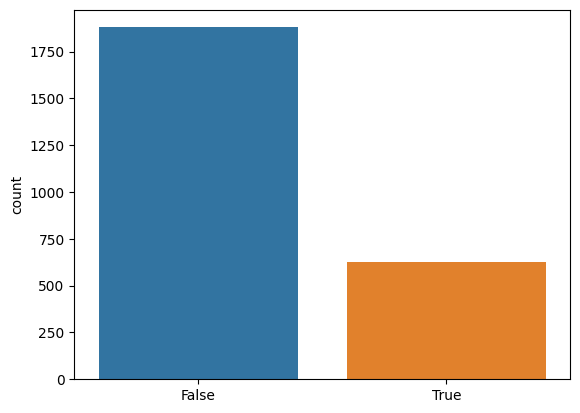

In [28]:
sns.countplot(x = filterF)

2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [29]:
years_00_002['certification'].value_counts()

R          453
PG-13      181
NR          68
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

3. What is the average revenue per certification category?	

In [30]:
years_00_002.groupby(['revenue', 'certification']).mean()

adult        budget             id  popularity  \
revenue     certification                                                   
0.0         -                0.0  0.000000e+00  172550.000000    1.051000   
            G                0.0  0.000000e+00  109056.300000    5.404100   
            NC-17            0.5  0.000000e+00  238414.500000    1.019667   
            NR               0.0  3.285731e+05  298536.178571    2.404714   
            PG               0.0  4.921875e+05   78057.031250    4.282813   
...                          ...           ...            ...         ...   
487853320.0 PG               0.0  6.000000e+07     808.000000  235.610000   
546388105.0 PG-13            0.0  1.250000e+08     955.000000   25.315000   
579707738.0 G                0.0  1.150000e+08     585.000000  178.246000   
871368364.0 PG-13            0.0  9.300000e+07     120.000000  137.828000   
976475550.0 PG               0.0  1.250000e+08     671.000000  294.712000   

                              runtime  video  vote_average    vote_count  
revenue     certification                                                 
0.0         -               90.000000    0.0      5.000000      7.000000  
            G               72.400000    0.1      5.583900     33.800000  
            NC-17           42.166667    0.0      5.472167      3.166667  
            NR              88.464286    0.0      3.674821     23.107143  
            PG              96.812500    0.0      5.793625     48.687500  
...                               ...    ...           ...           ...  
487853320.0 PG              90.000000    0.0      7.702000  14412.000000  
546388105.0 PG-13          123.000000    0.0      6.107000   5512.000000  
579707738.0 G               92.000000    0.0      7.824000  16038.000000  
871368364.0 PG-13          179.000000    0.0      8.388000  21696.000000  
976475550.0 PG             152.000000    0.0      7.915000  23427.000000  

[353 rows x 8 columns]

4. What is the average budget per certification category?


In [31]:
years_00_002.groupby(['budget', 'certification']).mean()

adult             id  popularity       revenue  \
budget      certification                                                   
0.0         -                0.0  172550.000000    1.051000  0.000000e+00   
            G                0.0  104095.818182    5.707000  9.109273e+03   
            NC-17            0.5  238414.500000    1.019667  0.000000e+00   
            NR               0.0  279473.807018    3.469281  1.429759e+05   
            PG               0.0   56180.193548    4.836548  9.052002e+05   
...                          ...            ...         ...           ...   
125000000.0 PG               0.0     671.000000  294.712000  9.764756e+08   
            PG-13            0.0     955.000000   25.315000  5.463881e+08   
127500000.0 PG               0.0   10567.000000   87.797000  3.542481e+08   
137000000.0 PG-13            0.0    2114.000000   15.778000  8.513183e+07   
140000000.0 PG-13            0.0     676.000000   49.473000  4.492209e+08   

                              runtime     video  vote_average    vote_count  
budget      certification                                                    
0.0         -               90.000000  0.000000      5.000000      7.000000  
            G               72.636364  0.090909      5.572909     35.636364  
            NC-17           42.166667  0.000000      5.472167      3.166667  
            NR              89.859649  0.000000      3.824895     31.842105  
            PG              95.096774  0.000000      5.950645     74.354839  
...                               ...       ...           ...           ...  
125000000.0 PG             152.000000  0.000000      7.915000  23427.000000  
            PG-13          123.000000  0.000000      6.107000   5512.000000  
127500000.0 PG              82.000000  0.000000      6.496000   2113.000000  
137000000.0 PG-13          106.000000  0.000000      6.172000   1239.000000  
140000000.0 PG-13          183.000000  0.000000      6.940000   5510.000000  

[209 rows x 8 columns]